In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import pickle
import yfinance as fyf



In [2]:
fyf.pdr_override()

In [3]:
df = pdr.get_data_yahoo('AAPL', start='2010-01-01',end='2023-04-30')
df.head()

[*********************100%***********************]  1 of 1 completed


Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.505280  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.516526  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.412872  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.401018  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.443575  447610800

In [4]:
df = df.reset_index()

In [5]:
df.head()

Date      Open      High       Low     Close  Adj Close     Volume
0 2010-01-04  7.622500  7.660714  7.585000  7.643214   6.505280  493729600
1 2010-01-05  7.664286  7.699643  7.616071  7.656429   6.516526  601904800
2 2010-01-06  7.656429  7.686786  7.526786  7.534643   6.412872  552160000
3 2010-01-07  7.562500  7.571429  7.466071  7.520714   6.401018  477131200
4 2010-01-08  7.510714  7.571429  7.466429  7.570714   6.443575  447610800

In [6]:
df = df.drop(['Adj Close', 'Date'], axis=1)

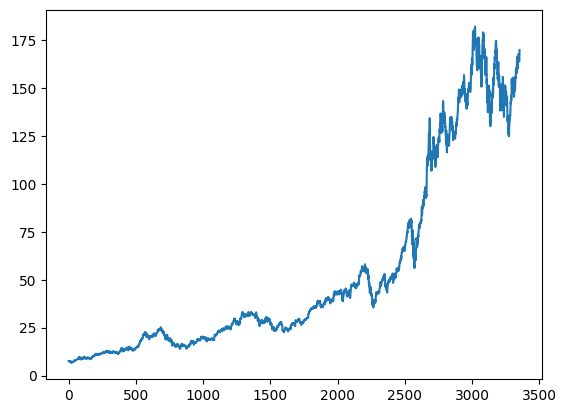

In [7]:
plt.plot(df.Close)

In [8]:
weekma = df.Close.rolling(100).mean()

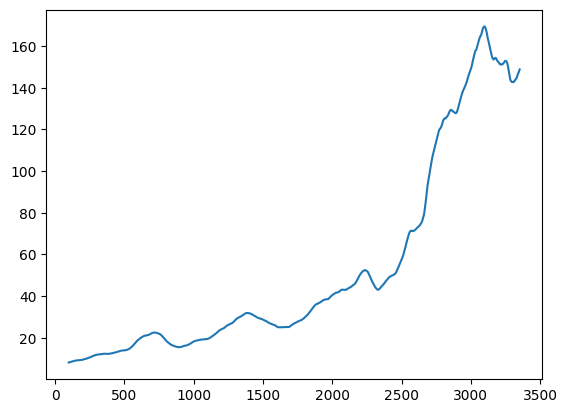

In [9]:
plt.plot(weekma)

In [10]:
df.shape

(3353, 5)

In [11]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing =  pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2347, 1)
(1006, 1)


In [12]:
data_training.head()

Close
0  7.643214
1  7.656429
2  7.534643
3  7.520714
4  7.570714

In [13]:
data_testing.tail()

Close
3348  165.330002
3349  163.770004
3350  163.759995
3351  168.410004
3352  169.679993

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.86580936],
       [0.84655549],
       [0.89469017]])

In [15]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])

In [16]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [17]:
x_train.shape

(2247, 100, 1)

In [18]:
y_train.shape

(2247,)

In [19]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [20]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1))) 
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True)) 
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True)) 
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu')) 
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [22]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [23]:
model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
71/71 [==============================] - 43s 408ms/step - loss: 0.0306
Epoch 2/100
71/71 [==============================] - 28s 398ms/step - loss: 0.0071
Epoch 3/100
71/71 [==============================] - 29s 402ms/step - loss: 0.0065
Epoch 4/100
71/71 [==============================] - 28s 387ms/step - loss: 0.0052
Epoch 5/100
71/71 [==============================] - 27s 383ms/step - loss: 0.0047
Epoch 6/100
71/71 [==============================] - 29s 407ms/step - loss: 0.0043
Epoch 7/100
71/71 [==============================] - 27s 385ms/step - loss: 0.0043
Epoch 8/100
71/71 [==============================] - 27s 386ms/step - loss: 0.0042
Epoch 9/100
71/71 [==============================] - 26s 366ms/step - loss: 0.0042
Epoch 10/100
71/71 [==============================] - 27s 384ms/step - loss: 0.0036
Epoch 11/100
71/71 [==============================] - 27s 374ms/step - loss: 0.0039
Epoch 12/100
71/71 [==============================] - 27s 385ms/step - loss: 0.0034
E

71/71 [==============================] - 33s 463ms/step - loss: 0.0015
Epoch 99/100
71/71 [==============================] - 33s 460ms/step - loss: 0.0016
Epoch 100/100
71/71 [==============================] - 33s 463ms/step - loss: 0.0017


In [24]:
model.save('keras_model.h5')

In [25]:
data_testing.head()

Close
2347  52.287498
2348  52.937500
2349  52.119999
2350  50.715000
2351  50.724998

In [26]:
past_100_days = data_training.tail(100)

In [27]:
final_df = past_100_days.append(data_testing, ignore_index = True)
final_df.head()


C:\Users\DELL\AppData\Local\Temp\ipykernel_3544\1499963260.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


Close
0  43.680000
1  42.122501
2  42.400002
3  42.157501
4  42.275002

In [28]:
inputs = scaler.transform(final_df)
inputs

array([[0.71974391],
       [0.68929938],
       [0.69472369],
       ...,
       [3.06695549],
       [3.15784953],
       [3.18267409]])

In [29]:
inputs.shape

(1106, 1)

In [30]:
x_test = [] 
y_test = []

for i in range(100, (inputs.shape[0])):
    x_test.append(inputs[i-100: i])
    y_test.append(inputs[i,0])

In [31]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1006, 100, 1)
(1006,)


In [32]:
y_predicted = (model.predict(x_test)) 

32/32 [==============================] - 7s 133ms/step


In [33]:
y_predicted.shape

(1006, 1)

In [34]:
scaler.scale_

array([0.01954707])

In [35]:
scale = 1/0.0378916
scale 

26.391073483305007

In [36]:
y_predicted = scale * y_predicted
y_test = scale * y_test

In [37]:
y_test.shape

(1006,)

In [38]:
y_predicted.shape

(1006, 1)

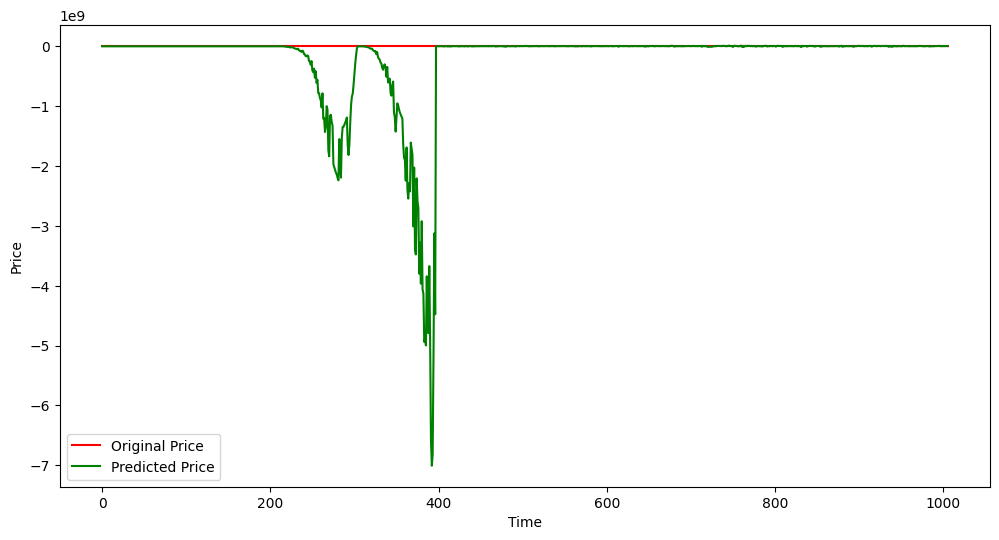

In [39]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'r', label = 'Original Price')
plt.plot(y_predicted, 'g', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()